In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [41]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Image preprocessing

In [43]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


#validation image pre processing

In [44]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [13]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[160.5  151.5  154.5 ]
   [154.5  145.5  148.5 ]
   [154.   145.   148.  ]
   ...
   [135.5  127.5  125.5 ]
   [134.   126.   124.  ]
   [142.   134.   132.  ]]

  [[155.5  146.5  149.5 ]
   [150.5  141.5  144.5 ]
   [154.25 145.25 148.25]
   ...
   [140.5  132.5  130.5 ]
   [136.   128.   126.  ]
   [138.5  130.5  128.5 ]]

  [[158.   149.   152.  ]
   [152.25 143.25 146.25]
   [153.   144.   147.  ]
   ...
   [148.75 140.75 138.75]
   [137.   129.   127.  ]
   [131.5  123.5  121.5 ]]

  ...

  [[162.25 153.25 148.25]
   [160.   151.   146.  ]
   [158.25 149.25 144.25]
   ...
   [136.   127.   122.  ]
   [140.5  131.5  126.5 ]
   [136.75 127.75 122.75]]

  [[161.25 152.25 147.25]
   [165.5  156.5  151.5 ]
   [162.75 153.75 148.75]
   ...
   [130.75 121.75 116.75]
   [141.5  132.5  127.5 ]
   [131.75 122.75 117.75]]

  [[161.75 152.75 147.75]
   [158.75 149.75 144.75]
   [166.75 157.75 152.75]
   ...
   [137.5  128.5  123.5 ]
   [134.5  125.5  120.5 ]
   [147.   138.   13

#To avoid overshooting
1-choose small learning rate default is 0.001 we are taking .0001
2-there may be chance of understanding so increasing number of neurons 
3-add more convolution layers to extract more features from image there may be posiblity that model is unable to capture the relavemnt feature 

#Building model

In [59]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [61]:
model=Sequential()

#convolution layer

In [64]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [66]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [68]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [70]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [72]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [74]:
model.add(Dropout(0.25))

In [76]:
model.add(Flatten())

In [78]:
model.add(Dense(units=1500,activation='relu'))

In [82]:
model.add(Dropout(0,4))

In [84]:
model.add(Dense(units=38,activation='softmax'))

##Compiling Model

In [87]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001) ,loss='categorical_crossentropy',metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

#Model Training

In [92]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5722s 3s/step - accuracy: 0.4503 - loss: 1.9462 - val_accuracy: 0.8214 - val_loss: 0.5646
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5464s 2s/step - accuracy: 0.8537 - loss: 0.4538 - val_accuracy: 0.9075 - val_loss: 0.2858
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5468s 2s/step - accuracy: 0.9154 - loss: 0.2583 - val_accuracy: 0.9202 - val_loss: 0.2464
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8988s 4s/step - accuracy: 0.9388 - loss: 0.1837 - val_accuracy: 0.9415 - val_loss: 0.1878
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5359s 2s/step - accuracy: 0.9551 - loss: 0.1296 - val_accuracy: 0.8920 - val_loss: 0.3690
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5486s 2s/step - accuracy: 0.9629 - loss: 0.1112 - val_accuracy: 0.9368 - val_loss: 0.2031
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5620s 3s/step - accuracy: 0.9722 - loss: 0.0852 - val_accuracy: 0.9578 - val_loss: 0.1404
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5513s 3s/step - accuracy: 0.9774 -

##Model Evaluation


In [97]:
#model evaluation on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1787s 813ms/step - accuracy: 0.9776 - loss: 0.0697


In [98]:
print(train_loss,train_acc)

0.06230834126472473 0.9797425270080566


In [99]:
#model evaluation on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 433s 786ms/step - accuracy: 0.9448 - loss: 0.1802


In [100]:
print(val_loss,val_acc)

0.180430606007576 0.9458228945732117


Saving Model

In [165]:
model.save("trained_model.h5")

In [166]:
training_history.history

{'accuracy': [0.6465609073638916,
  0.8745287656784058,
  0.9226830005645752,
  0.9431822896003723,
  0.9584038853645325,
  0.9674087762832642,
  0.9730706214904785,
  0.9784337282180786,
  0.979898989200592,
  0.982801079750061],
 'loss': [1.1900618076324463,
  0.38702720403671265,
  0.23466062545776367,
  0.16979055106639862,
  0.12235942482948303,
  0.09785636514425278,
  0.08299735188484192,
  0.06563925743103027,
  0.060275398194789886,
  0.05320242419838905],
 'val_accuracy': [0.821420431137085,
  0.9075233340263367,
  0.9201570749282837,
  0.9414978623390198,
  0.8919872641563416,
  0.9368312954902649,
  0.957773745059967,
  0.9523674249649048,
  0.9620987772941589,
  0.9458228945732117],
 'val_loss': [0.5645870566368103,
  0.285808265209198,
  0.2464223951101303,
  0.18775929510593414,
  0.36902493238449097,
  0.20308922231197357,
  0.1403627246618271,
  0.17017370462417603,
  0.12887531518936157,
  0.1804305464029312]}

In [167]:
#recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

Accuracy visu

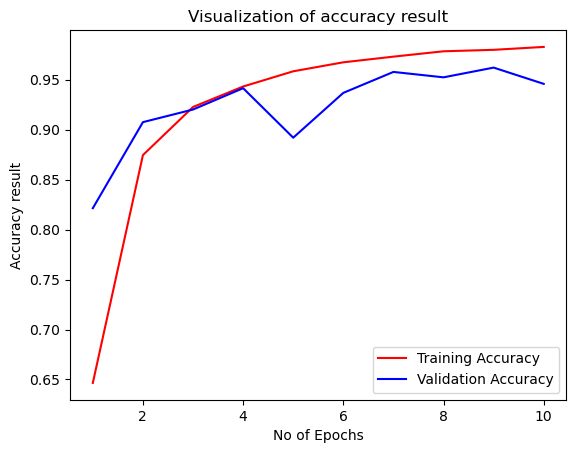

In [169]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy result")
plt.title("Visualization of accuracy result")
plt.legend()
plt.show()

metrics for model evalution

In [174]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [126]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [128]:
y_pred=model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 422s 765ms/step


array([[9.9988365e-01, 1.1009087e-04, 7.9264524e-08, ..., 1.7839677e-12,
        1.6161539e-11, 7.1541872e-10],
       [9.9996281e-01, 9.3568660e-06, 3.8259859e-07, ..., 1.7577568e-11,
        2.4795057e-11, 1.8502035e-09],
       [9.9999809e-01, 1.7096783e-06, 1.4488820e-08, ..., 8.0916204e-17,
        6.9940202e-14, 1.2283308e-11],
       ...,
       [4.4077859e-07, 1.9857187e-10, 2.0756535e-05, ..., 7.5776480e-10,
        3.1501282e-10, 9.9994516e-01],
       [6.3054133e-05, 1.5034919e-08, 4.3708282e-05, ..., 2.3907794e-06,
        5.0363747e-07, 9.9906904e-01],
       [1.2202430e-12, 1.7619379e-13, 4.5049419e-13, ..., 9.1754393e-13,
        5.4987677e-12, 9.9999928e-01]], dtype=float32)

In [129]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [130]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [134]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [138]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [146]:
from sklearn.metrics import classification_report,confusion_matrix

In [144]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.87      0.96      0.91       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.90      0.99      0.94       440
                                   Apple___healthy       0.97      0.88      0.92       502
                               Blueberry___healthy       0.97      0.94      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.98      0.96       421
                 Cherry_(including_sour)___healthy       0.97      0.97      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.85      0.94      0.89       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.92      0.

In [148]:
cm=confusion_matrix(y_true,predicted_categories)
cm

array([[482,   0,   3, ...,   0,   0,   0],
       [  1, 491,   1, ...,   0,   0,   0],
       [  0,   0, 435, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 476,   0,   0],
       [  0,   0,   0, ...,   0, 428,   0],
       [  2,   0,  10, ...,   0,   0, 457]], dtype=int64)

Confusion Matrix

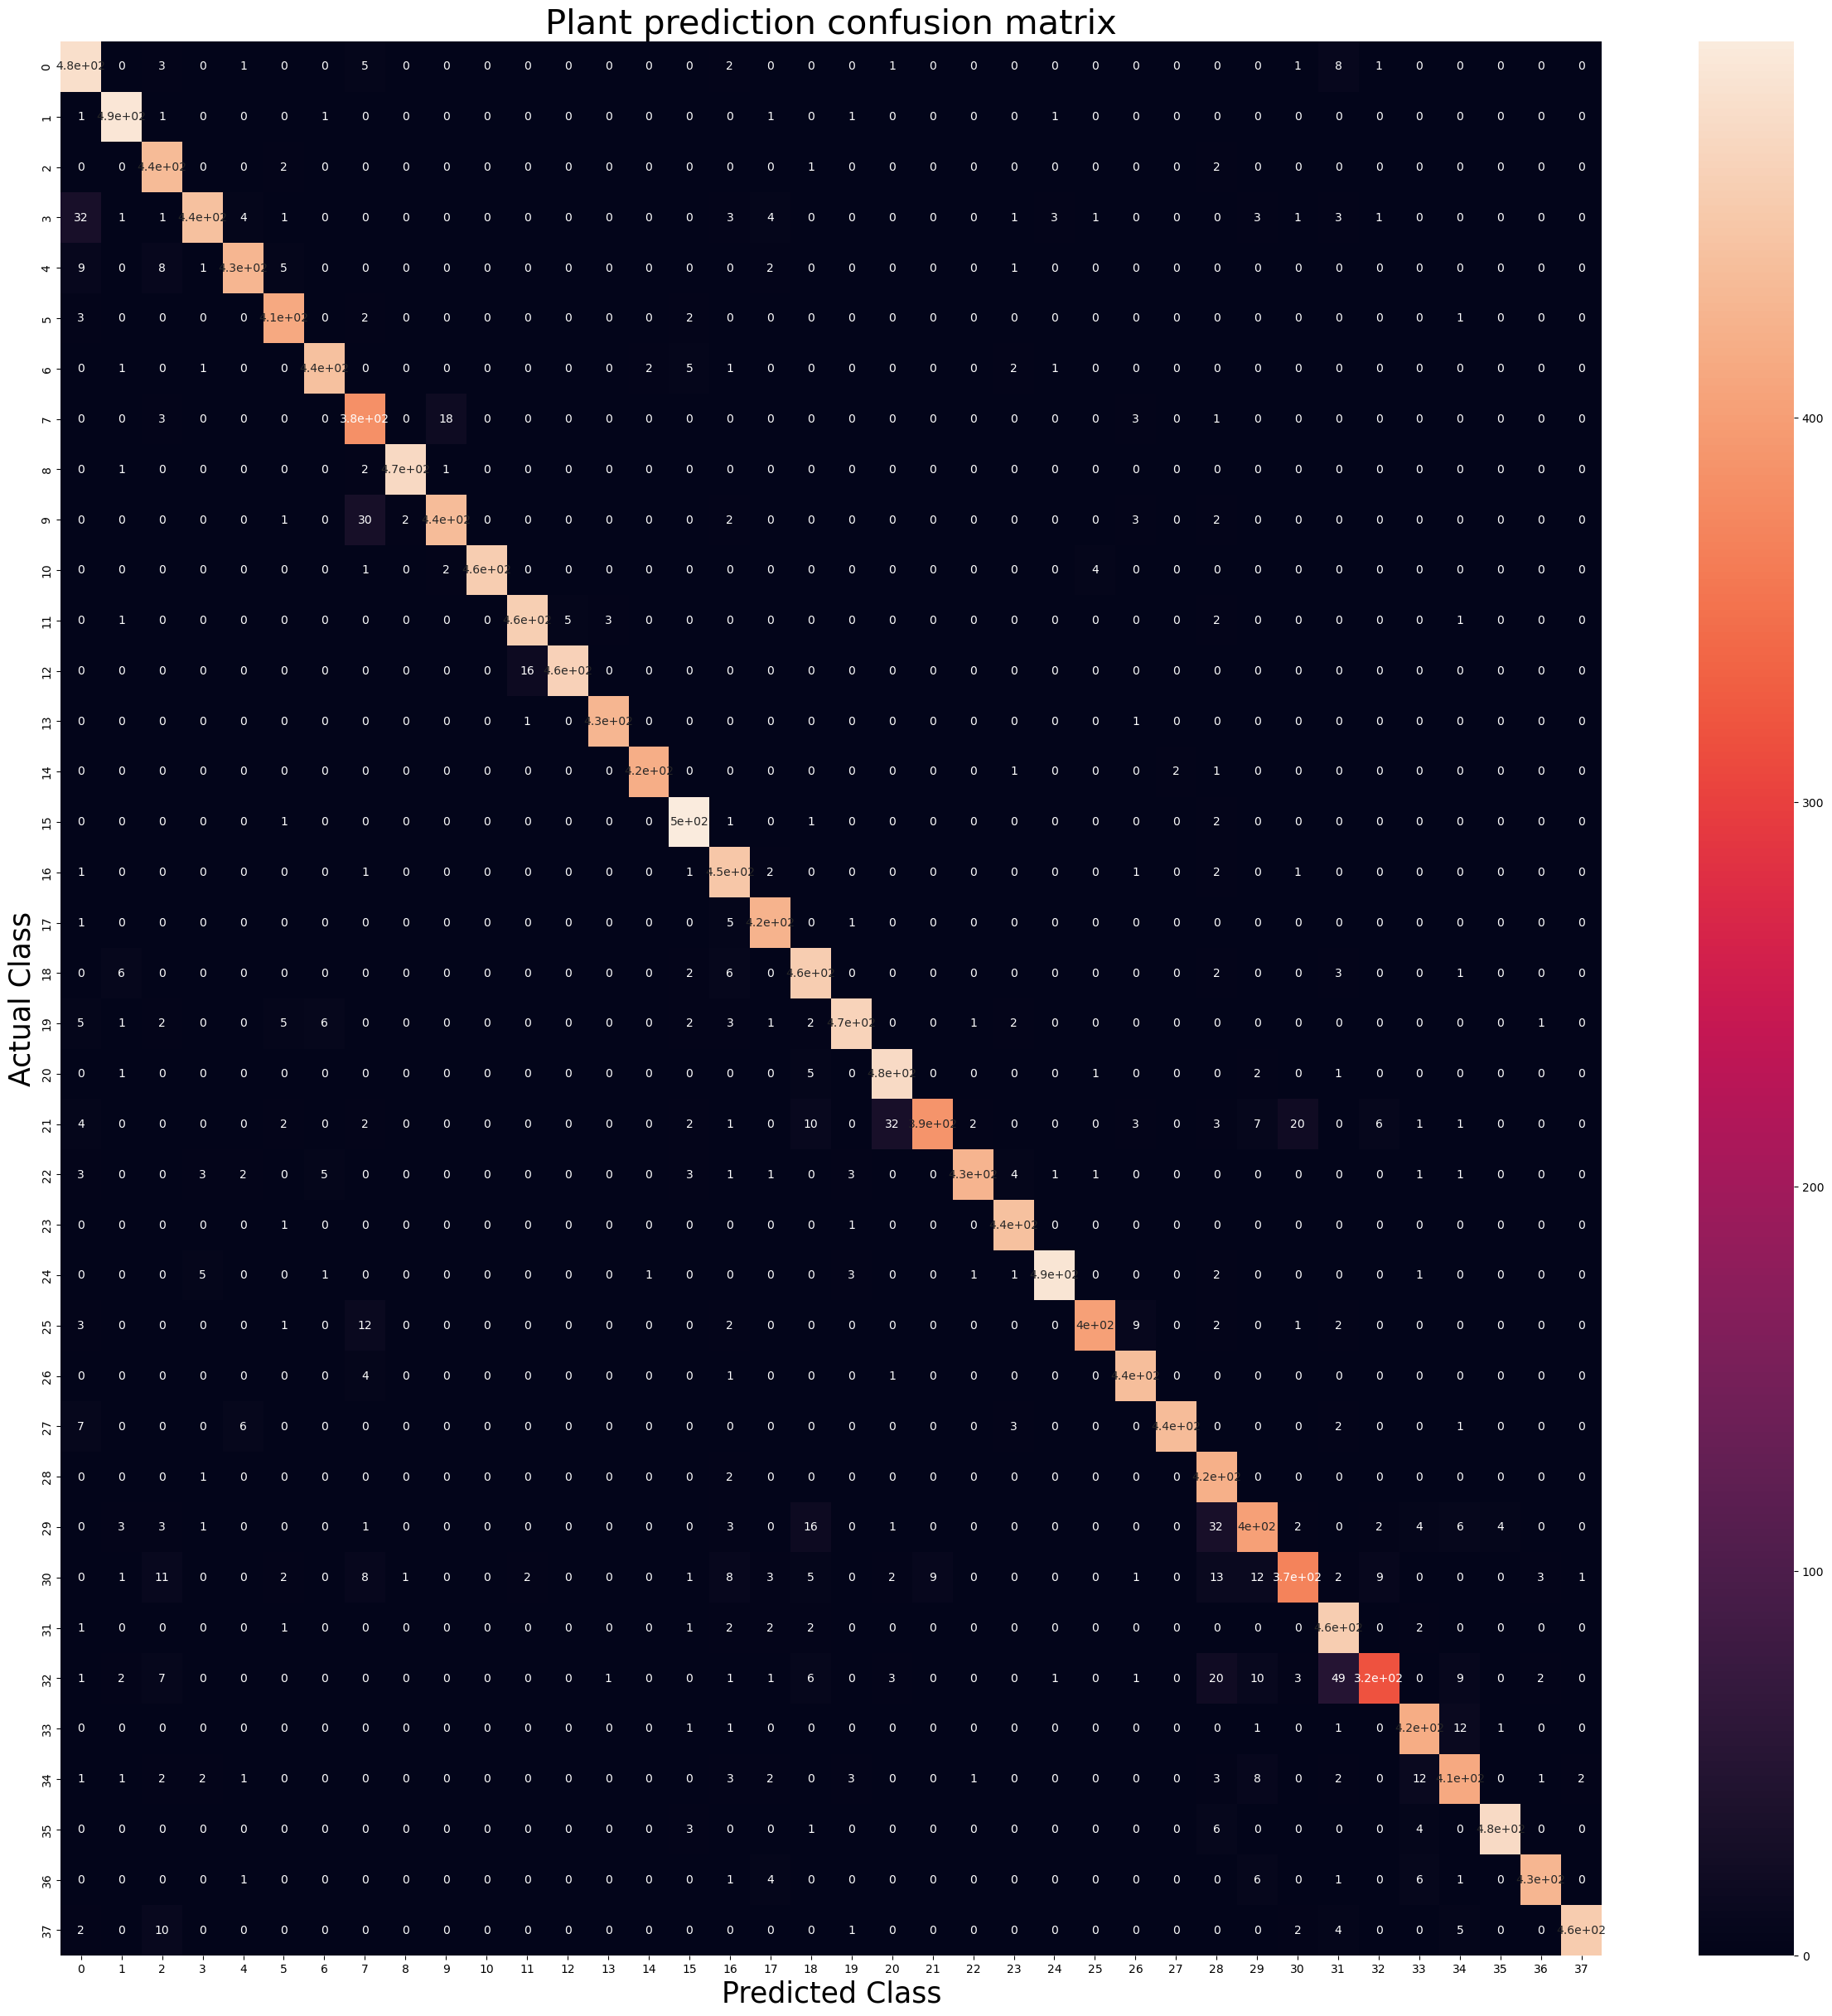

In [163]:
plt.figure(figsize=(30,30))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=25)
plt.ylabel("Actual Class",fontsize=25)
plt.title("Plant prediction confusion matrix", fontsize=30)
plt.show()

In [ ]:
pip install 